### 1.Problem statement: 
#### As we know, it is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible. 

### 2.attributes:
#### RowNumber — corresponds to the record (row) number and has no effect on the output.
#### CustomerId — contains random values and has no effect on customer leaving the bank.
#### Surname — the surname of a customer has no impact on their decision to leave the bank.
#### CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
#### Geography — a customer’s location can affect their decision to leave the bank.
#### Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
#### Age — Age of the customers,this is certainly relevant.
#### Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
#### Balance — also a very good indicator of customer churn, as it decides if the customer will leave the bank or not.
#### NumOfProducts — refers to the number of products that a customer has purchased through the bank.
#### HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. 0-No,1-Yes
#### IsActiveMember — active customers are less likely to leave the bank.0-No,1-Yes
#### EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
#### Exited — whether or not the customer left the bank.  0-not exited ,1 - exited


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv(r"C:\Users\51606\Downloads\churn.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3518,3519,15600688,Liston,600,France,Female,39,5,0.00,2,0,0,118272.07,0
7979,7980,15627042,Reilly,555,France,Female,26,7,0.00,2,1,0,93122.41,0
5622,5623,15766649,Vincent,670,France,Male,38,10,89416.99,1,0,0,144275.39,0
8063,8064,15663888,Connor,549,Germany,Male,34,6,204017.40,2,1,0,109538.35,0
4663,4664,15578783,Mai,620,Germany,Male,35,0,76989.97,1,1,1,17242.79,0
813,814,15775306,Ni,421,Germany,Male,28,8,122384.22,3,1,1,89017.38,1
691,692,15688251,Mamelu,767,France,Male,43,1,76408.85,2,1,0,77837.63,0
3059,3060,15670619,Coppin,631,France,Female,33,8,0.00,2,0,0,117374.22,0
2776,2777,15685109,Teng,689,France,Male,39,7,0.00,2,0,0,14917.09,0
4333,4334,15748327,Anderson,724,Germany,Male,34,6,118235.70,2,0,0,157137.23,0


In [6]:
df.shape

(10000, 14)

### There are 10000 observations and 14 columns in the dataset
### Out of 14 columns there are 13 independent variables and 1 dependent variable 
### Dependent variable - Exited 

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

### Data Visualization

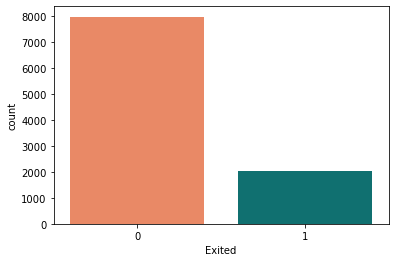

In [12]:
sns.countplot(x="Exited",data=df,palette=["coral","teal"])
plt.show()

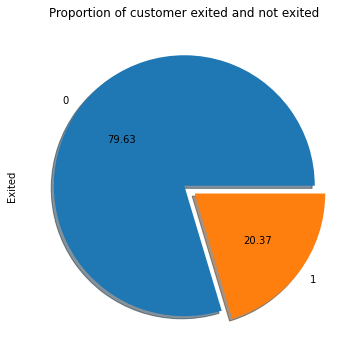

In [13]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()

In [14]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Out of 10000, 2037 people have exited the bank and 7963 have not exited the bank

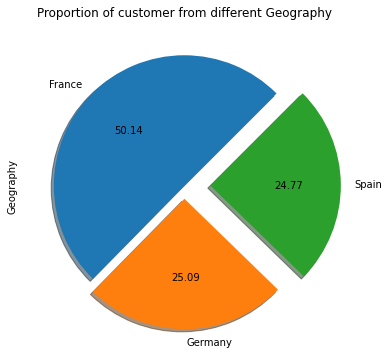

In [15]:
value_counts = pd.value_counts(df['Geography'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

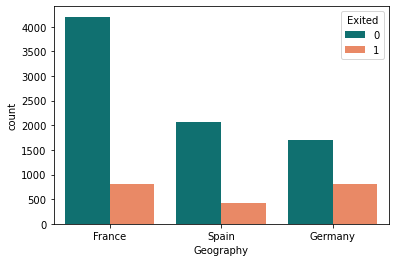

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [16]:
sns.countplot(x="Geography",hue="Exited",palette=["Teal","coral"],data=df)
plt.show()
pd.crosstab(df["Geography"],df["Exited"])

### France has the highest accounts in the bank then spain and germany respectively and germany has the highest number of people who have exited the bank

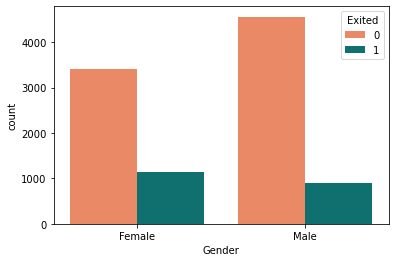

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [17]:
sns.countplot(x="Gender",hue="Exited",palette=["coral","teal"],data=df)
plt.show()
pd.crosstab(df["Gender"],df["Exited"])

### There are more males than females and females have exited the bank more than females

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

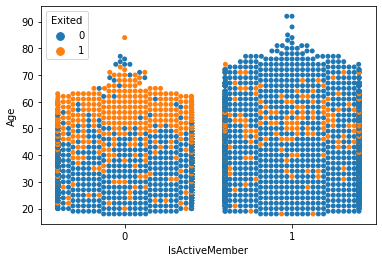

In [18]:
sns.swarmplot(x="IsActiveMember",y="Age",hue="Exited",data=df)

### In IsActive member 0 is No and 1 is Yes , There are more active members than non active and mostly people who are not active have exited compared to active members and are of older age 

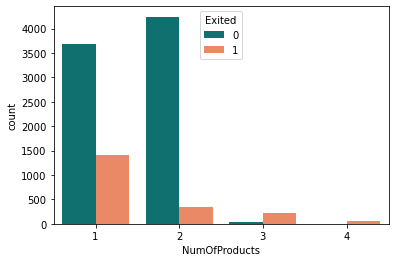

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [19]:
sns.countplot(x="NumOfProducts",hue="Exited",palette=["teal","coral"],data=df)
plt.show()
pd.crosstab(df["NumOfProducts"],df["Exited"])

### From the above we can see that 
### 1. people having 4 cards have all exited and people having 3 cards are the 2nd most people who have exited
### 2. people having 2 cards have exited less than compared to people having 1 card, and also people having 3 and 4 cards


<AxesSubplot:xlabel='Exited', ylabel='Age'>

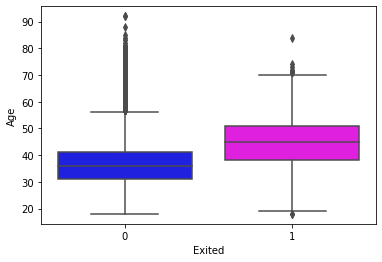

In [20]:
sns.boxplot(x="Exited",y="Age",palette=["blue","magenta"],data=df)

### People who have exited are older in age compared to people who have not exited the bank

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

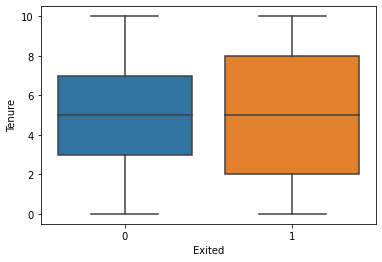

In [21]:
sns.boxplot(x="Exited",y="Tenure",data=df)

### People who have exited their tenure is mostly from 2 to 8 and not exited from 3 to 5

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

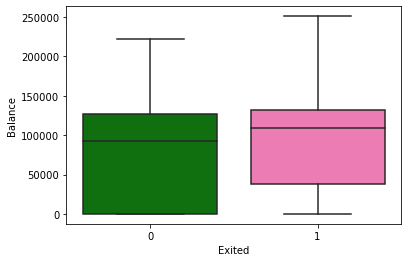

In [22]:
sns.boxplot(x="Exited",y="Balance",palette=["green","hotpink"],data=df)

### People who have a little higher balance are the ones who exited the bank more compared to people with less balance in the bank

<AxesSubplot:xlabel='Age', ylabel='Balance'>

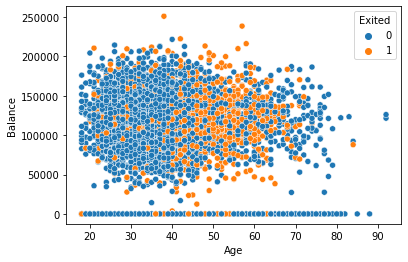

In [23]:
sns.scatterplot(x ="Age", y ="Balance", hue ="Exited", data = df)

###  Customers around the age 40 to 70 years are more who are to leave or exit the bank

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

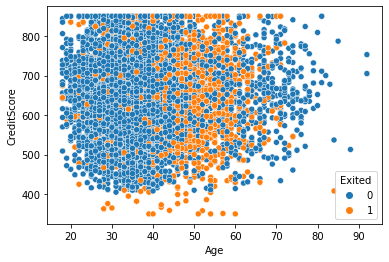

In [24]:
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", data = df)

### People with CreditScore less than 400 are likely or have exited the bank

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

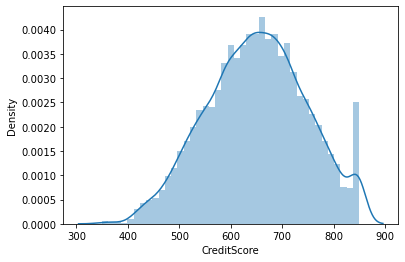

In [25]:
sns.distplot(df["CreditScore"])

### The credit score is mostly distributed around 400 to 800

<AxesSubplot:xlabel='Age', ylabel='Density'>

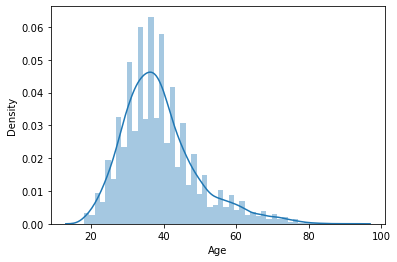

In [26]:
sns.distplot(df["Age"])

### The age is mostly around 20 to 60

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

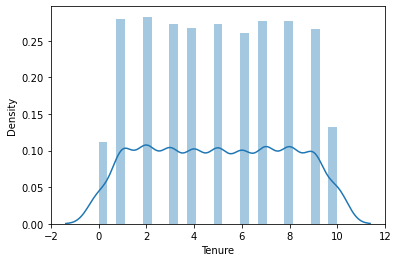

In [27]:
sns.distplot(df["Tenure"])

### In tenure mostly people have 1 to 9

<AxesSubplot:xlabel='Balance', ylabel='Density'>

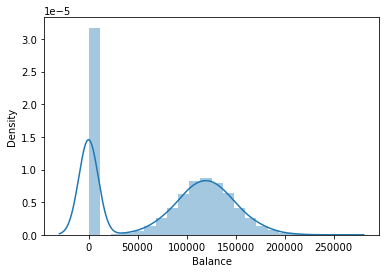

In [28]:
sns.distplot(df["Balance"])

### There are many people who have zero balance in the accounts compared to people having any other balance

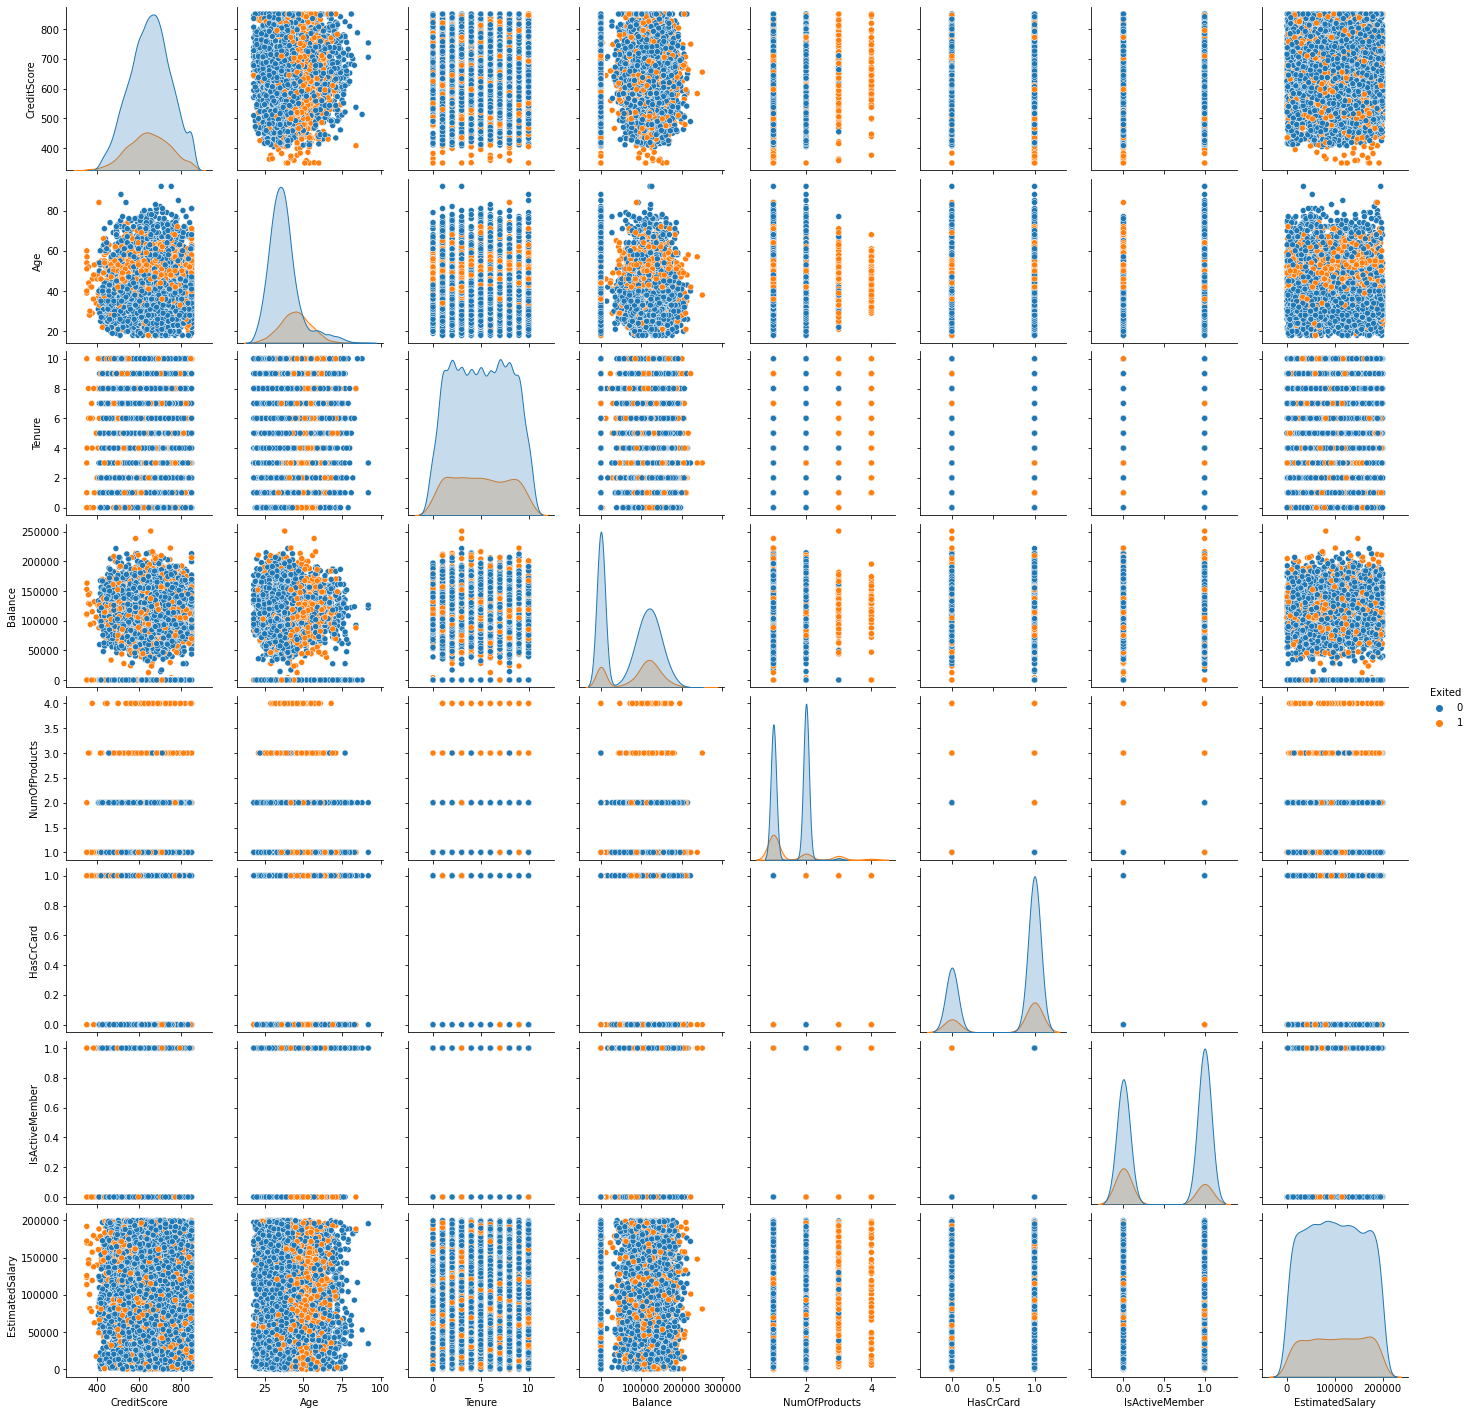

In [29]:
sns.pairplot(df,hue="Exited")

### Heatmap

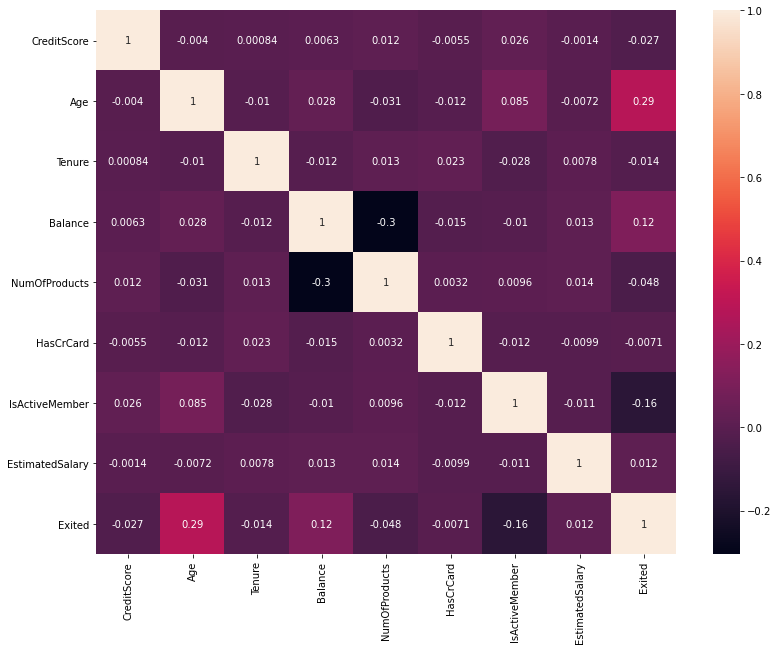

In [30]:
plt.figure(figsize=(13,10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()


### There is a negative corelation between NumOfProducts and Balance,IsActivemember and Exited and there is a positive relation between age and exited,balance and exited, IsActiveMember and age

### Outlier Analysis

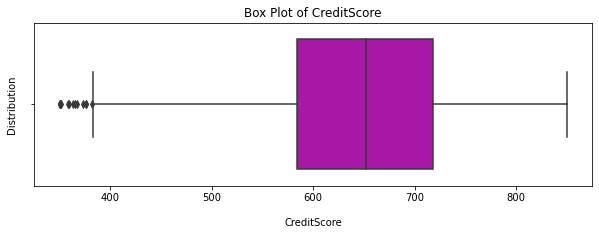

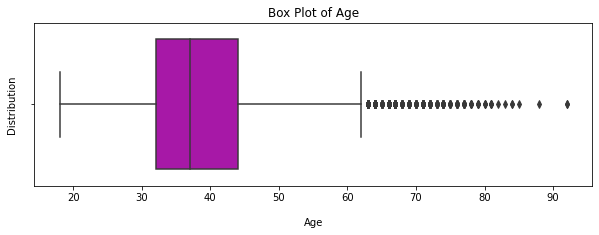

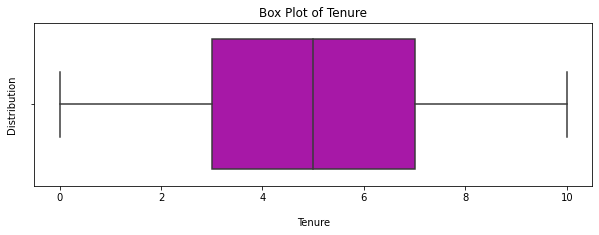

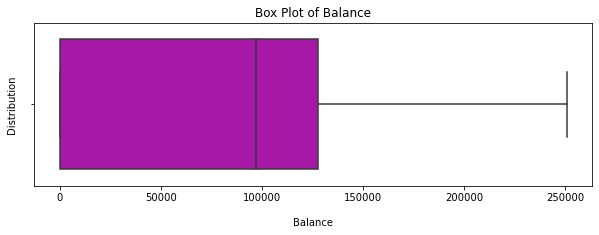

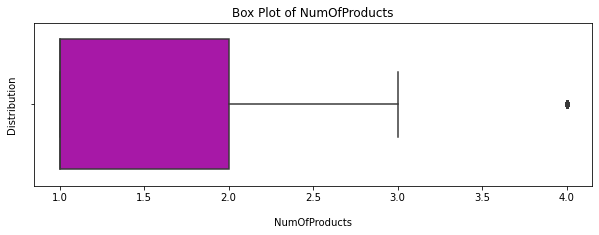

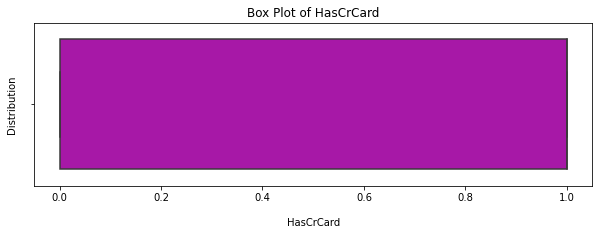

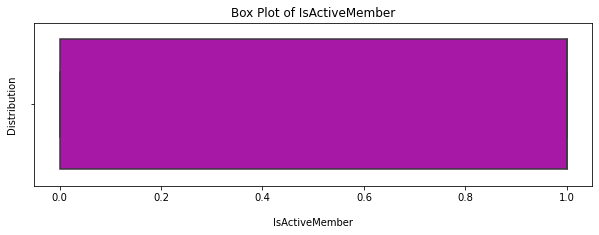

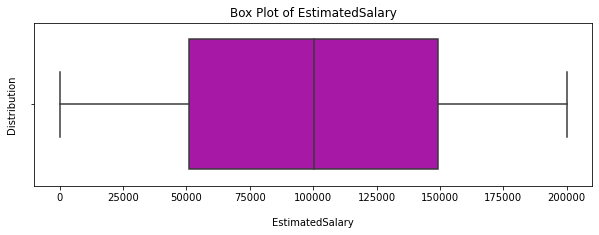

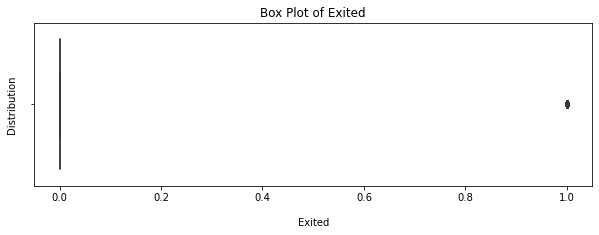

In [31]:
for i in enumerate(df.select_dtypes(exclude=['object']).columns):
    plt.figure(figsize=(10,3))
    
    title_ = "Box Plot of " + str(i[1])
    plt.subplot(1, 1, 1)
    sns.boxplot(x = str(i[1]), data = df, color = 'm')
    plt.title(title_)
    plt.xlabel(str(i[1]), labelpad = 15)
    plt.ylabel("Distribution", labelpad = 10)
    
    plt.show()

### Here there are some outliers in the age column and creditscore but they seem genuine so we're not removing them

### Models

In [32]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [33]:
duplicate=df.duplicated()
duplicate.sum()

0

In [34]:
df=pd.get_dummies(columns=["Geography","Gender"],data=df)

In [35]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [36]:
x=df.drop("Exited",axis=1)

In [37]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [38]:
y=df["Exited"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

### Logistic Regression

In [40]:
model_1=LogisticRegression()

In [41]:
model_1.fit(x_train,y_train)

LogisticRegression()

In [42]:
model_1.score(x_train,y_train)

0.7938571428571428

In [43]:
model_1.score(x_test,y_test)

0.7863333333333333

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model_2=DecisionTreeClassifier(max_depth=8)

In [46]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [47]:
model_2.score(x_train,y_train)

0.8855714285714286

In [48]:
model_2.score(x_test,y_test)

0.8556666666666667

### Bagging Classifier

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
model_3=BaggingClassifier(n_estimators=100,max_samples=23)

model_3=BaggingClassifier(n_estimators=40,max_samples=10)

In [51]:
model_3.fit(x_train,y_train)

BaggingClassifier(max_samples=23, n_estimators=100)

In [52]:
model_3.score(x_train,y_train)

0.8102857142857143

In [53]:
model_3.score(x_test,y_test)

0.8026666666666666

### Boosting Classifier

### Ada Boost

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
model_4=AdaBoostClassifier(n_estimators=70,learning_rate=0.2)

In [56]:
model_4.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=70)

In [57]:
model_4.score(x_train,y_train)

0.8607142857142858

In [58]:
model_4.score(x_test,y_test)

0.8566666666666667

### Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
model_5=GradientBoostingClassifier(learning_rate=0.5)

In [61]:
model_5.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5)

In [62]:
model_5.score(x_train,y_train)

0.9151428571428571

In [63]:
model_5.score(x_test,y_test)

0.8553333333333333

### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model_6=RandomForestClassifier(n_estimators=50,max_depth=3)

In [66]:
model_6.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [67]:
model_6.score(x_train,y_train)

0.8202857142857143

In [68]:
model_6.score(x_test,y_test)

0.8113333333333334

### Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
model_7=GaussianNB()

In [71]:
model_7.fit(x_train,y_train)

GaussianNB()

In [72]:
model_7.score(x_train,y_train)

0.7878571428571428

In [73]:
model_7.score(x_test,y_test)

0.784

### KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
model_8=KNeighborsClassifier(n_neighbors=7)

In [76]:
model_8.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [77]:
model_8.score(x_train,y_train)

0.8111428571428572

In [78]:
model_8.score(x_test,y_test)

0.7726666666666666

### SVC Classifier

In [79]:
from sklearn.svm import SVC

In [80]:
model_9=SVC()

In [81]:
model_9.fit(x_train,y_train)

SVC()

In [82]:
model_9.score(x_train,y_train)

0.7985714285714286

In [83]:
model_9.score(x_test,y_test)

0.791

### Sampling (SMOTE)

<AxesSubplot:xlabel='Exited', ylabel='count'>

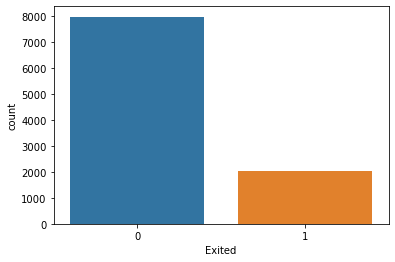

In [84]:
sns.countplot(x="Exited",data=df)

In [85]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Here we can see that our data is imbalanced that is around 80% majority and 20% minority so to balance the dataset we use SMOTE 

In [86]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


### SMOTE 

In [87]:
from imblearn.over_sampling import SMOTE
X_sample,Y_sample=SMOTE().fit_resample(x,y)

In [88]:
Y_sample.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(X_sample,Y_sample,test_size=0.30,random_state=1)

### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler=StandardScaler()

In [92]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### After scaling

### Models

In [93]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Logistic Regression

In [94]:
model_15=LogisticRegression()

In [95]:
model_15.fit(x_train,y_train)

LogisticRegression()

In [96]:
model_15.score(x_train,y_train)

0.843200574094008

In [97]:
model_15.score(x_test,y_test)

0.834658853076601

In [98]:
y_pred=model_15.predict(x_test)

<AxesSubplot:>

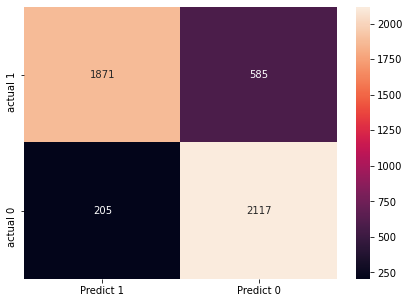

In [99]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [100]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.834658853076601
Precision score 0.901252408477842
Recall score 0.7618078175895765


### Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
model_16=DecisionTreeClassifier(max_depth=9)

In [103]:
model_16.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [104]:
model_16.score(x_train,y_train)

0.8931646932185145

In [105]:
model_16.score(x_test,y_test)

0.8539137714524906

In [106]:
y_pred=model_16.predict(x_test)

<AxesSubplot:>

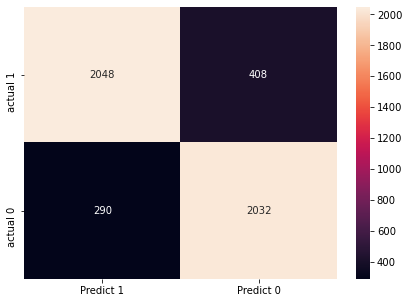

In [107]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [108]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.8539137714524906
Precision score 0.8759623609923011
Recall score 0.8338762214983714


### Bagging Classifier

In [109]:
from sklearn.ensemble import BaggingClassifier

In [110]:
model_17=BaggingClassifier(n_estimators=60,max_samples=35)

In [111]:
model_17.fit(x_train,y_train)

BaggingClassifier(max_samples=35, n_estimators=60)

In [112]:
model_17.score(x_train,y_train)

0.8147649802655185

In [113]:
model_17.score(x_test,y_test)

0.8041021347844286

In [114]:
y_pred=model_17.predict(x_test)

<AxesSubplot:>

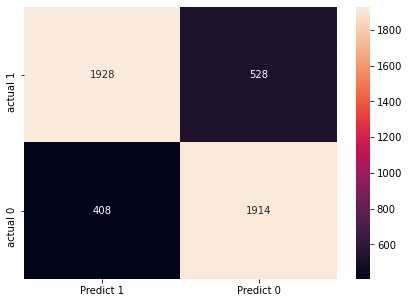

In [115]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [116]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.8041021347844286
Precision score 0.8253424657534246
Recall score 0.7850162866449512


### AdaBoostClassifier

In [117]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
model_18=AdaBoostClassifier(n_estimators=100,learning_rate=1.7)

In [119]:
model_18.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.7, n_estimators=100)

In [120]:
model_18.score(x_train,y_train)

0.8801578758521708

In [121]:
model_18.score(x_test,y_test)

0.8624947676852239

In [122]:
y_pred=model_18.predict(x_test)

<AxesSubplot:>

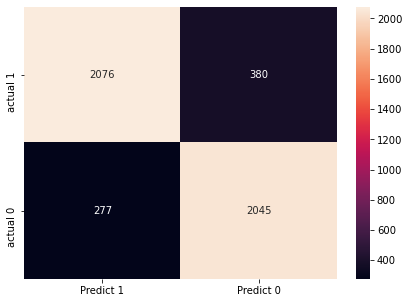

In [123]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [124]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.8624947676852239
Precision score 0.8822779430514237
Recall score 0.8452768729641694


### GradientBoostingClassifier

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
model_19=GradientBoostingClassifier(n_estimators=40,learning_rate=1.2)

In [127]:
model_19.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.2, n_estimators=40)

In [128]:
model_19.score(x_train,y_train)

0.9085934696806602

In [129]:
model_19.score(x_test,y_test)

0.8691921305985768

In [130]:
y_pred=model_19.predict(x_test)

<AxesSubplot:>

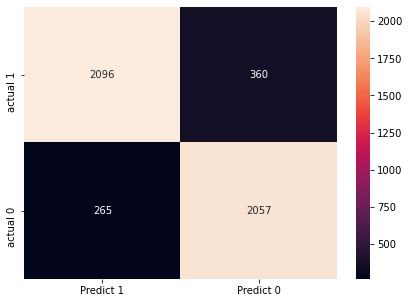

In [131]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [132]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.8691921305985768
Precision score 0.8877594239728929
Recall score 0.8534201954397395


### Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
model_20=RandomForestClassifier(n_estimators=50,max_depth=10)

In [135]:
model_20.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [136]:
model_20.score(x_train,y_train)

0.9259059921062074

In [137]:
model_20.score(x_test,y_test)

0.8754709083298451

In [138]:
y_pred=model_20.predict(x_test)

<AxesSubplot:>

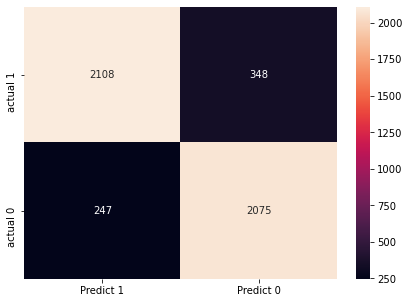

In [139]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [140]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.8754709083298451
Precision score 0.8951167728237792
Recall score 0.8583061889250815


### Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
model_21=GaussianNB()

In [143]:
model_21.fit(x_train,y_train)

GaussianNB()

In [144]:
model_21.score(x_train,y_train)

0.8057050592034446

In [145]:
model_21.score(x_test,y_test)

0.7907074089577228

In [146]:
y_pred=model_21.predict(x_test)

<AxesSubplot:>

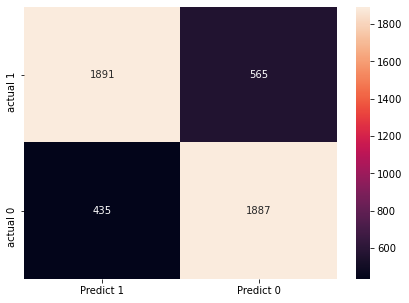

In [147]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [148]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.7907074089577228
Precision score 0.8129836629406707
Recall score 0.7699511400651465


### KNN Neighbors Classifier

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
model_22=KNeighborsClassifier(n_neighbors=25)

In [151]:
model_22.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [152]:
model_22.score(x_train,y_train)

0.8659849300322928

In [153]:
model_22.score(x_test,y_test)

0.8543323566345752

In [154]:
y_pred=model_22.predict(x_test)

<AxesSubplot:>

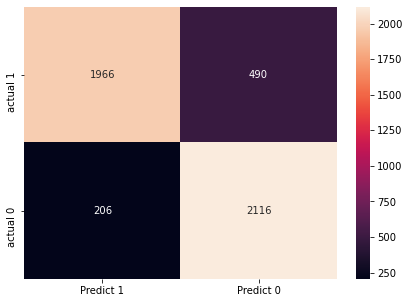

In [155]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [156]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.8543323566345752
Precision score 0.9051565377532228
Recall score 0.8004885993485342


### SVC

In [157]:
from sklearn.svm import SVC

In [158]:
model_23=SVC(probability=True)

In [159]:
model_23.fit(x_train,y_train)

SVC(probability=True)

In [160]:
model_23.score(x_train,y_train)

0.8893074991029781

In [161]:
model_23.score(x_test,y_test)

0.8765173712850565

In [162]:
y_pred=model_23.predict(x_test)

<AxesSubplot:>

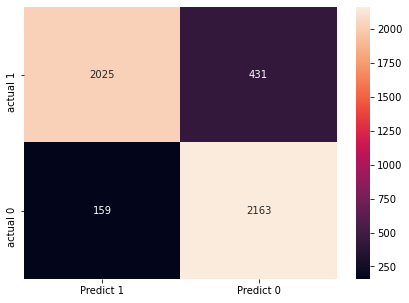

In [163]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [164]:
print('Accuracy score %s' % accuracy_score(y_test,y_pred))
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))

Accuracy score 0.8765173712850565
Precision score 0.9271978021978022
Recall score 0.8245114006514658


### ROC Curve and AUC score

In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [166]:
#Prediction Probabilities 
lr_probs = model_15.predict_proba(x_test)
de_probs = model_16.predict_proba(x_test)
bgc_probs =model_17.predict_proba(x_test)
adb_probs =model_18.predict_proba(x_test)
gb_probs =model_19.predict_proba(x_test)
rf_probs = model_20.predict_proba(x_test)
nb_probs = model_21.predict_proba(x_test)
svc_probs = model_23.predict_proba(x_test)
kn_probs = model_22.predict_proba(x_test)



In [167]:
lr_probs = lr_probs[:,1]
de_probs = de_probs [:,1]
bgc_probs = bgc_probs[:,1]
adb_probs = adb_probs[:,1]
gb_probs = gb_probs[:,1]
rf_probs = rf_probs[:,1]
nb_probs = nb_probs [:,1]
svc_probs = svc_probs [:, 1]
kn_probs = kn_probs[:,1]

In [168]:
lr_auc = roc_auc_score(y_test,lr_probs )
de_auc = roc_auc_score(y_test, de_probs)
bgc_auc = roc_auc_score(y_test,bgc_probs )
adb_auc = roc_auc_score(y_test,adb_probs )
gb_auc = roc_auc_score(y_test,gb_probs )
rf_auc = roc_auc_score(y_test,rf_probs )
nb_auc = roc_auc_score(y_test, nb_probs) 
svc_auc = roc_auc_score (y_test, svc_probs)
kn_auc = roc_auc_score (y_test, kn_probs)


In [169]:
print('Logistic Regression : AUROC - % 0.3f' % (lr_auc))
print('Decision Tree : AUROC - % 0.3f' % (de_auc))
print('Bagging Classifier : AUROC - % 0.3f' % (bgc_auc))
print('Ada boost Classifier : AUROC - % 0.3f' % (adb_auc))
print('Gradient Boosting : AUROC - % 0.3f' % (gb_auc))
print('Random forest : AUROC = % 0.3f ' % (rf_auc))
print('Naive Bayes : AUROC - % 0.3f' % (nb_auc))
print('Support Vector Machine : AUROC = % 0.3f' % (svc_auc))
print('KNN: AUROC = % 0.3f' % (kn_auc))

plt.show()


Logistic Regression : AUROC -  0.911
Decision Tree : AUROC -  0.914
Bagging Classifier : AUROC -  0.888
Ada boost Classifier : AUROC -  0.938
Gradient Boosting : AUROC -  0.937
Random forest : AUROC =  0.946 
Naive Bayes : AUROC -  0.872
Support Vector Machine : AUROC =  0.940
KNN: AUROC =  0.931


In [170]:
lr_fpr, lr_tpr, _ = roc_curve (y_test , lr_probs)
de_fpr, de_tpr, _ = roc_curve (y_test , de_probs)
bgc_fpr, bgc_tpr, _ = roc_curve (y_test , bgc_probs)
adb_fpr, adb_tpr, _ = roc_curve (y_test , adb_probs)
gb_fpr, gb_tpr, _ = roc_curve (y_test , gb_probs)
rf_fpr, rf_tpr , _ = roc_curve (y_test , rf_probs)
nb_fpr, nb_tpr , _ = roc_curve (y_test , nb_probs)
svc_fpr, svc_tpr, _ = roc_curve (y_test , svc_probs)
kn_fpr, kn_tpr , _ = roc_curve (y_test , kn_probs)

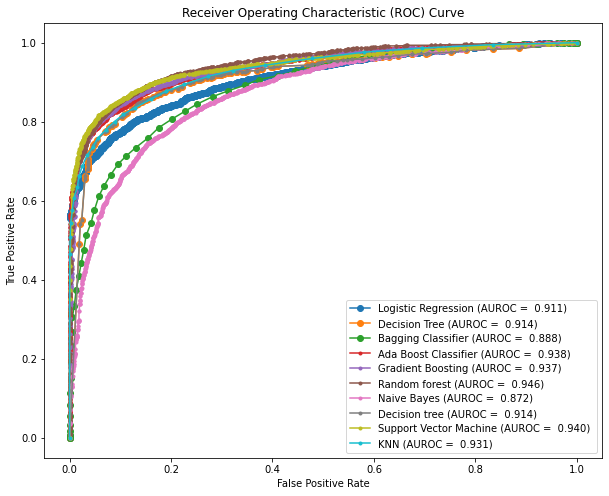

In [171]:
fig, ax=plt.subplots(figsize=(10,8))

plt.plot(lr_fpr, lr_tpr ,marker ='o',label = 'Logistic Regression (AUROC = % 0.3f) ' % lr_auc)
plt.plot(de_fpr, de_tpr ,marker ='o',label = 'Decision Tree (AUROC = % 0.3f) ' % de_auc)
plt.plot(bgc_fpr, bgc_tpr ,marker ='o',label = 'Bagging Classifier (AUROC = % 0.3f) ' % bgc_auc)
plt.plot(adb_fpr, adb_tpr ,marker ='.',label = 'Ada Boost Classifier (AUROC = % 0.3f) ' % adb_auc)
plt.plot(gb_fpr, gb_tpr,marker= '.', label='Gradient Boosting (AUROC = % 0.3f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr,marker= '.', label='Random forest (AUROC = % 0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr , marker ='.',label ='Naive Bayes (AUROC = % 0.3f)' % nb_auc)
plt.plot(de_fpr, de_tpr, marker='.',label='Decision tree (AUROC = % 0.3f) ' % de_auc)
plt.plot(svc_fpr, svc_tpr ,marker='.',label = 'Support Vector Machine (AUROC = % 0.3f) ' % svc_auc)
plt.plot(kn_fpr, kn_tpr ,marker ='.',label = 'KNN (AUROC = % 0.3f) ' % kn_auc)

plt.xlabel("False Positive Rate")
plt.ylabel ('True Positive Rate')

plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
    
plt.show()

### According to roc curve we can say that Random Forest Classifier has the best AUC Score so that is the better model compared to others